## 손글씨 숫자 인식
### - 데이터 불러오기

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [19]:
import sys, os
sys.path.append('./mnist_dataset')
#sys.path.append(os.pardir)

import numpy as np
import pickle
from mnist_dataset.mnist import load_mnist
import matplotlib.pylab as plt

In [20]:
(train_image_data, train_label_data), (test_image_data, test_label_data) = load_mnist(flatten=True, 
                                                                                      normalize=False)

In [21]:
print(train_image_data.shape)
print(train_label_data.shape)
print(test_image_data.shape)
print(test_label_data.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [16]:
image = train_image_data[0]
image.shape

(784,)

In [17]:
image_reshaped = image.reshape(28, 28)
image_reshaped.shape

(28, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

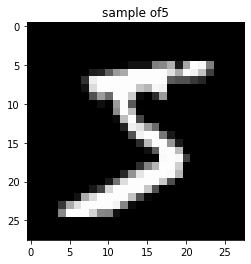

In [18]:
label = train_label_data[0]
plt.figure(figsize=(4,4))
plt.title("sample of"+str(label))
plt.imshow(image_reshaped, cmap="gray")
plt.show

### - 신경망의 손글씨 숫자 추론

In [35]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0,x)

def softmax(matrix):
    maximum_of_matrix = np.max(matrix)
    difference_from_maximum = matrix - maximum_of_matrix
    exponential_of_difference = np.exp(difference_from_maximum)
    sum_of_exponential = np.sum(exponential_of_difference)
    y = exponential_of_difference / sum_of_exponential
    
    return y

In [43]:
def get_data():
    (image_train, label_train), (image_test, label_test) = load_mnist(normalize=True,
                                                                     flatten=True,
                                                                     one_hot_label=False)
    return image_test, label_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:  
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3)+b3
    y = softmax(a3)
    
    return y

In [44]:
images, labels = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(images)):
    y = predict(network, images[i])
    p = np.argmax(y)
    
    if p == labels[i]:
        accuracy_cnt +=1
        
print("Accuracy:"+ str(float(accuracy_cnt)/len(images)))
    

Accuracy:0.9352


### - 배치 처리

In [45]:
images, labels= get_data()
network = init_network()

In [46]:
print("shape of images=", images.shape)  # 크기 784로 되어있는 이미지 10000장
print("shape of weight1=", network["W1"].shape)  # 784개의 노드를 50개로
print("shape of weight2=", network["W2"].shape)  # 50 -> 100
print("shape of weight3=", network["W3"].shape)  # 100 -> 10

shape of images= (10000, 784)
shape of weight1= (784, 50)
shape of weight2= (50, 100)
shape of weight3= (100, 10)


In [47]:
batch_size = 100  # 100개로 묶는다.
accuracy_cnt = 0

for i in range(0, len(images), batch_size):
    x_batch = images[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)  # 각 열에서 가장 높은 값 
    accuracy_cnt += np.sum(p==labels[i:i+batch_size])ㄴ
    
print("Accuracy:"+str(float(accuracy_cnt)/len(images)))

Accuracy:0.9352
